# Objective
* This Analysis helps Banks in detecting the loan that customers has difficults in repaying the loan. 
* Banks will not wrongly reject the potential cases

In [261]:
import pandas as pd
import numpy as np          
import decimal
import datetime 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools


# Loading data

In [262]:
df_app= pd.read_csv('/Users/alvin/Desktop/Alvin_CFH/Bank/ Bank Loan Default Risk Analysis/application_data.csv')

In [263]:
df_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
df_app.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Processing data

application df

<Axes: >

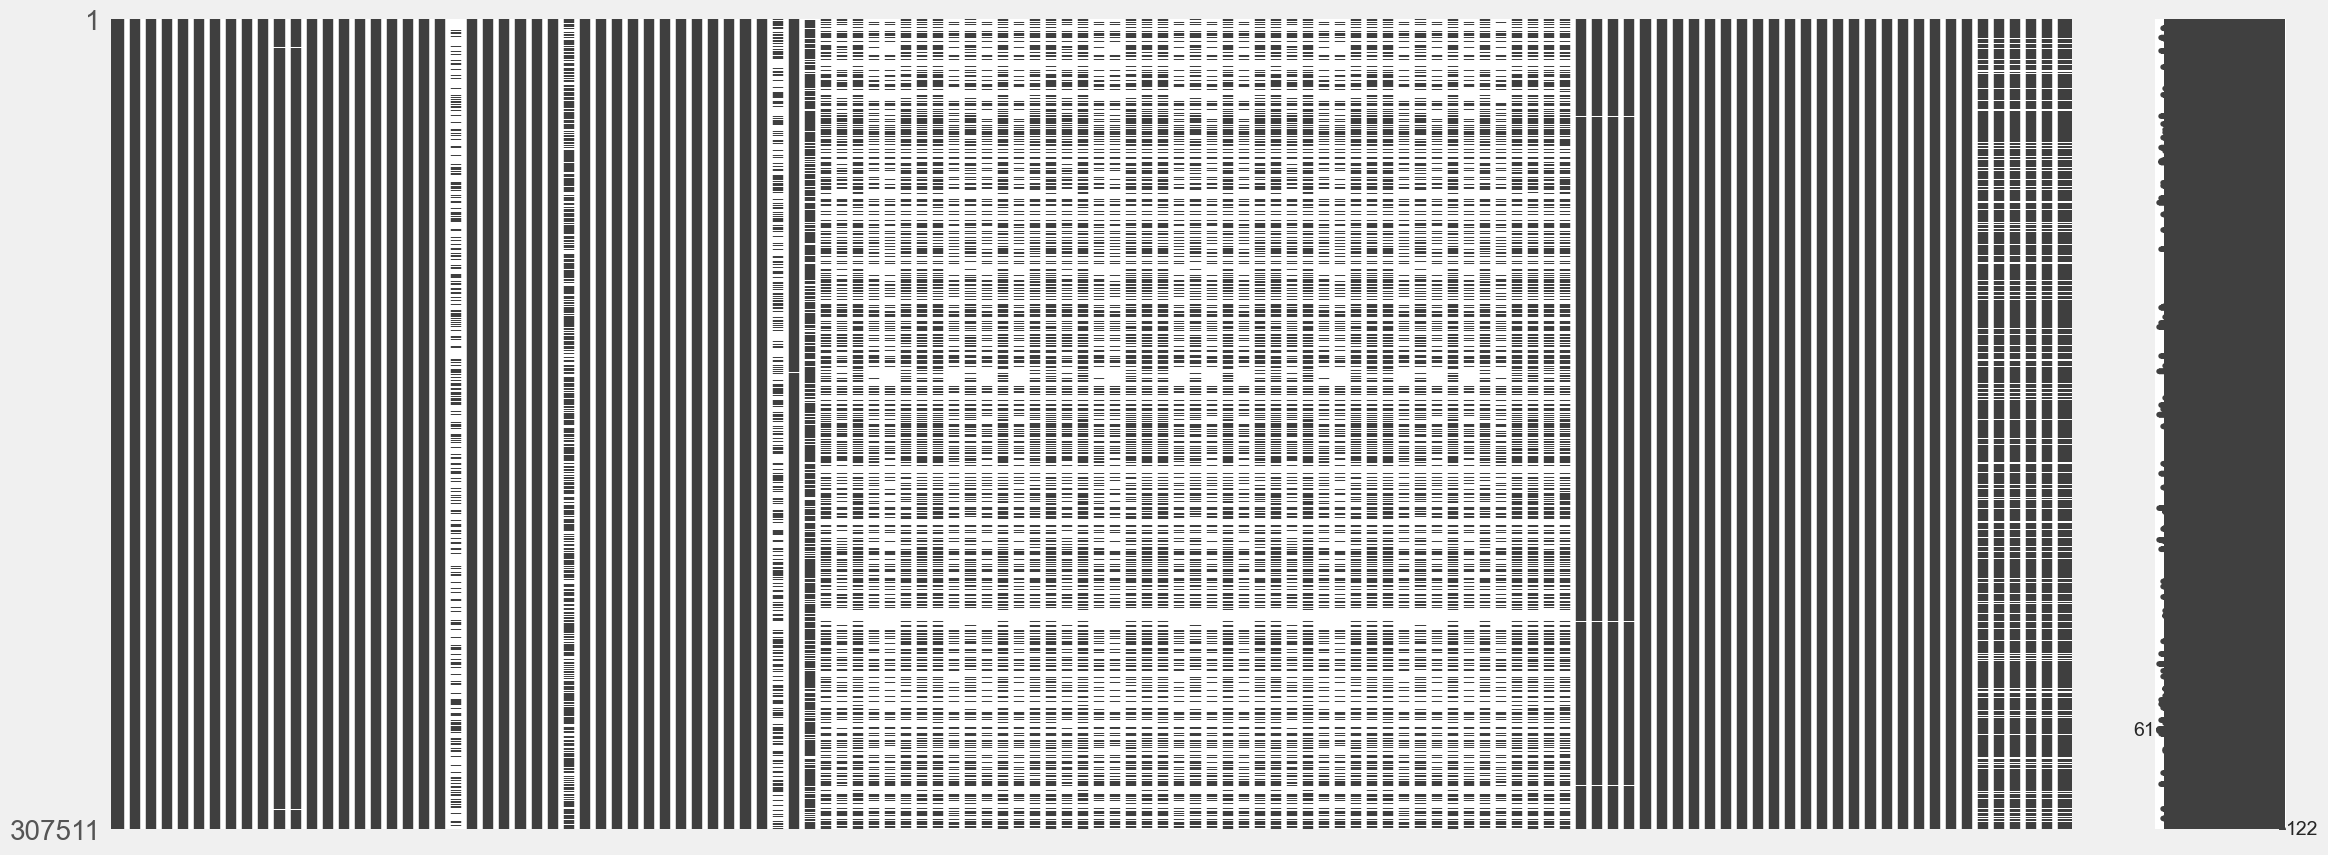

In [265]:
# null distribution in each column
import missingno as mn
mn.matrix(df_app)

In [266]:
#drop unimportant columns in df_app
df_app = df_app.drop(columns = [
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG','COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])

In [267]:
# % null value in each column in df_app
round(df_app.isnull().sum() / df_app.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [268]:
df_app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [269]:
df_app.shape

(307511, 52)

??? OCCUPATION_TYPE has hight %null value, but can not convert to float to draw correlation

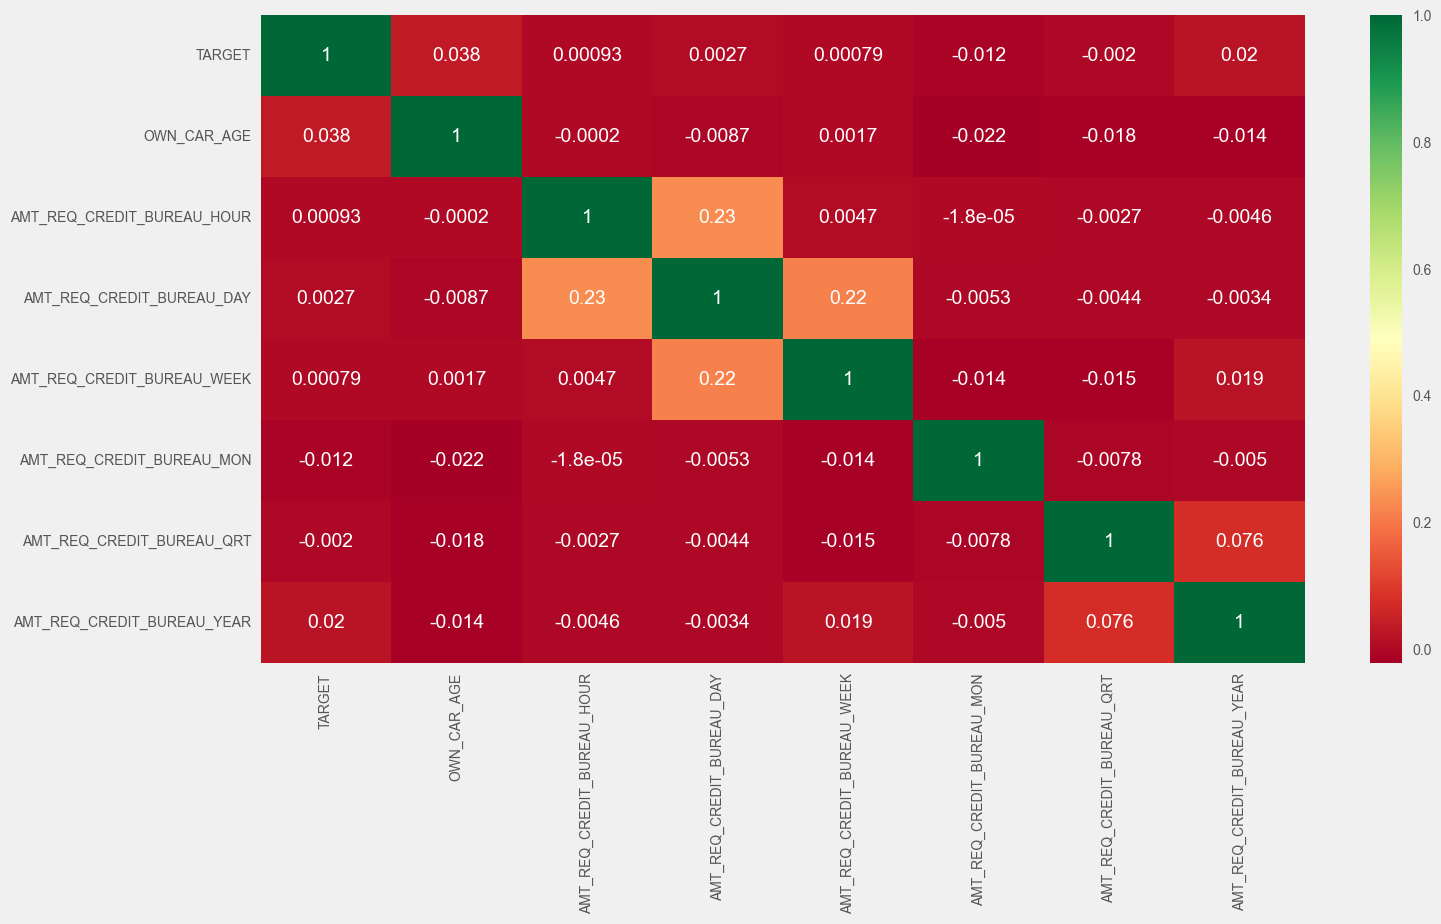

In [270]:
# check correlation between the columns which has high %null value and the target column
df_app_corr = df_app[['TARGET', 'OWN_CAR_AGE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]

df_app_corr = df_app_corr.corr()
ax = sns.heatmap(df_app_corr,
            xticklabels=df_app_corr.columns,
            yticklabels=df_app_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [271]:
# drop AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT due to no correlation with target column
df_app = df_app.drop(columns = ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','OWN_CAR_AGE'])

In [272]:
df_app.shape

(307511, 49)

fill null value in application df

In [273]:
round(df_app.isnull().sum() / df_app.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [274]:
df_app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

solve null value in OCCUPATION_TYPE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR

In [275]:
#fill null value in OCCUPATION_TYPE column with 'Other'
df_app['OCCUPATION_TYPE'] = df_app['OCCUPATION_TYPE'].fillna('Other')

In [276]:
df_app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Other                    96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

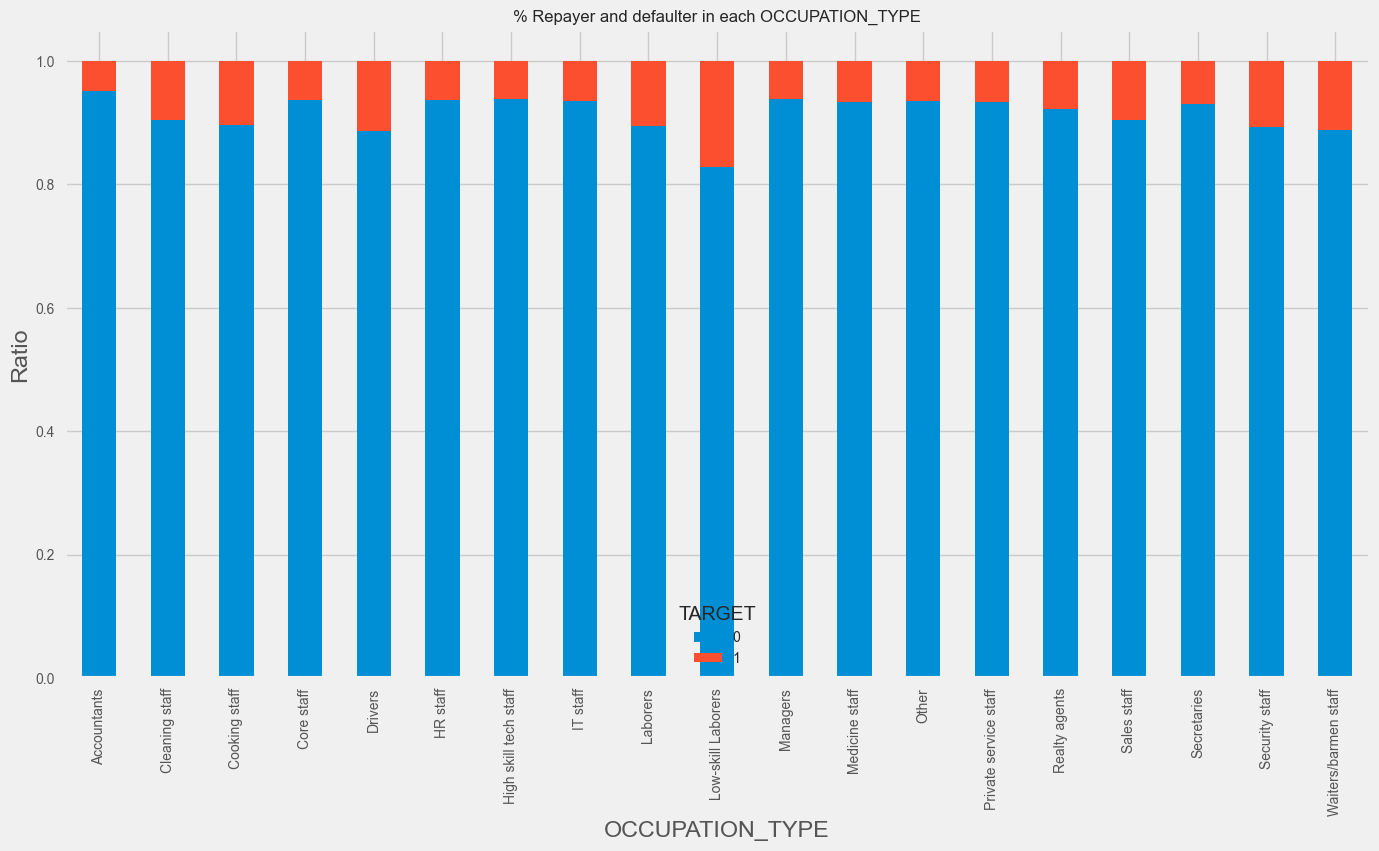

In [277]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df_app.OCCUPATION_TYPE, df_app.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('% Repayer and defaulter in each OCCUPATION_TYPE', fontsize=12)
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Ratio')
plt.show()

INSIGHT: Low-skill Labourers has the highest risk in not paid the loan or pay lately.

Solve null value

Check % Repayer and defaulter of each value in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR to decide how to fill null value

In [278]:
df_AMT_REQ_CREDIT_BUREAU = df_app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']]

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_730/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


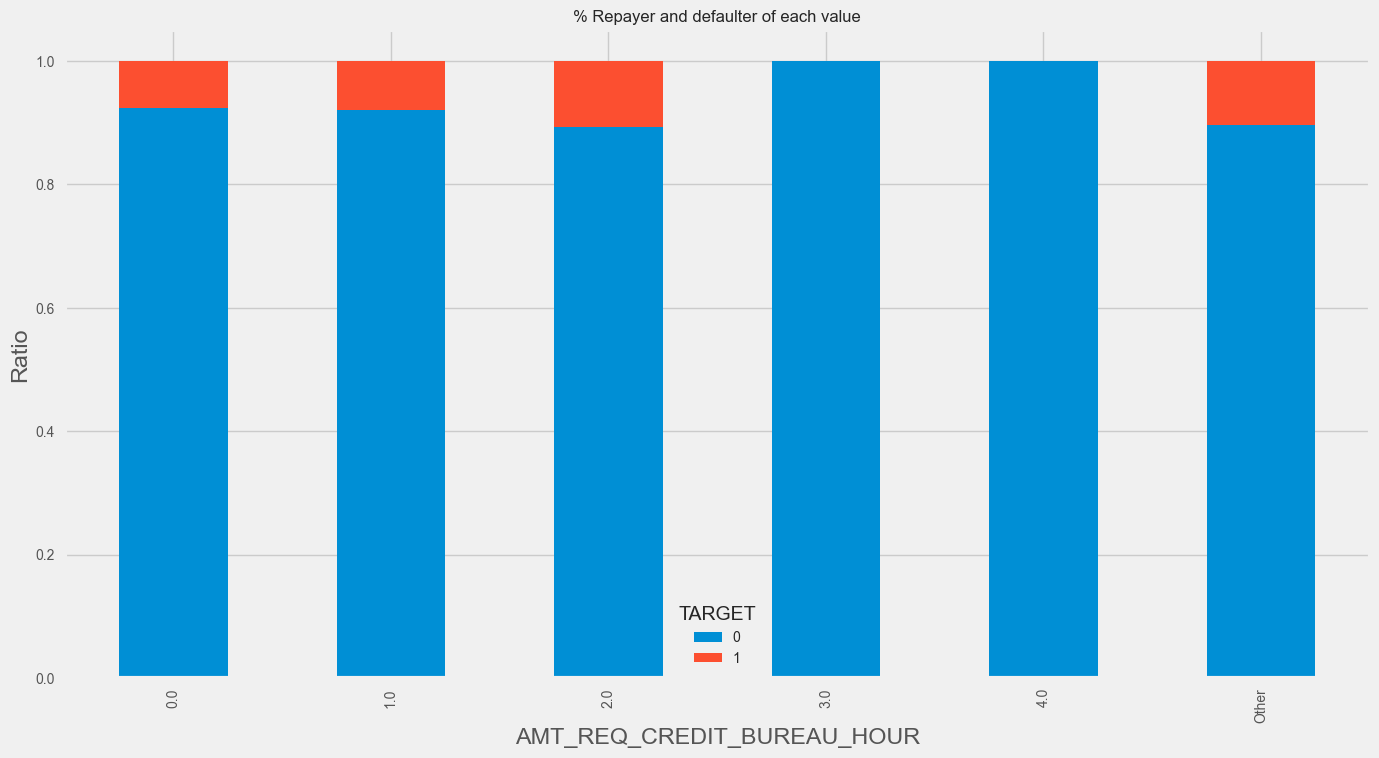

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_730/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


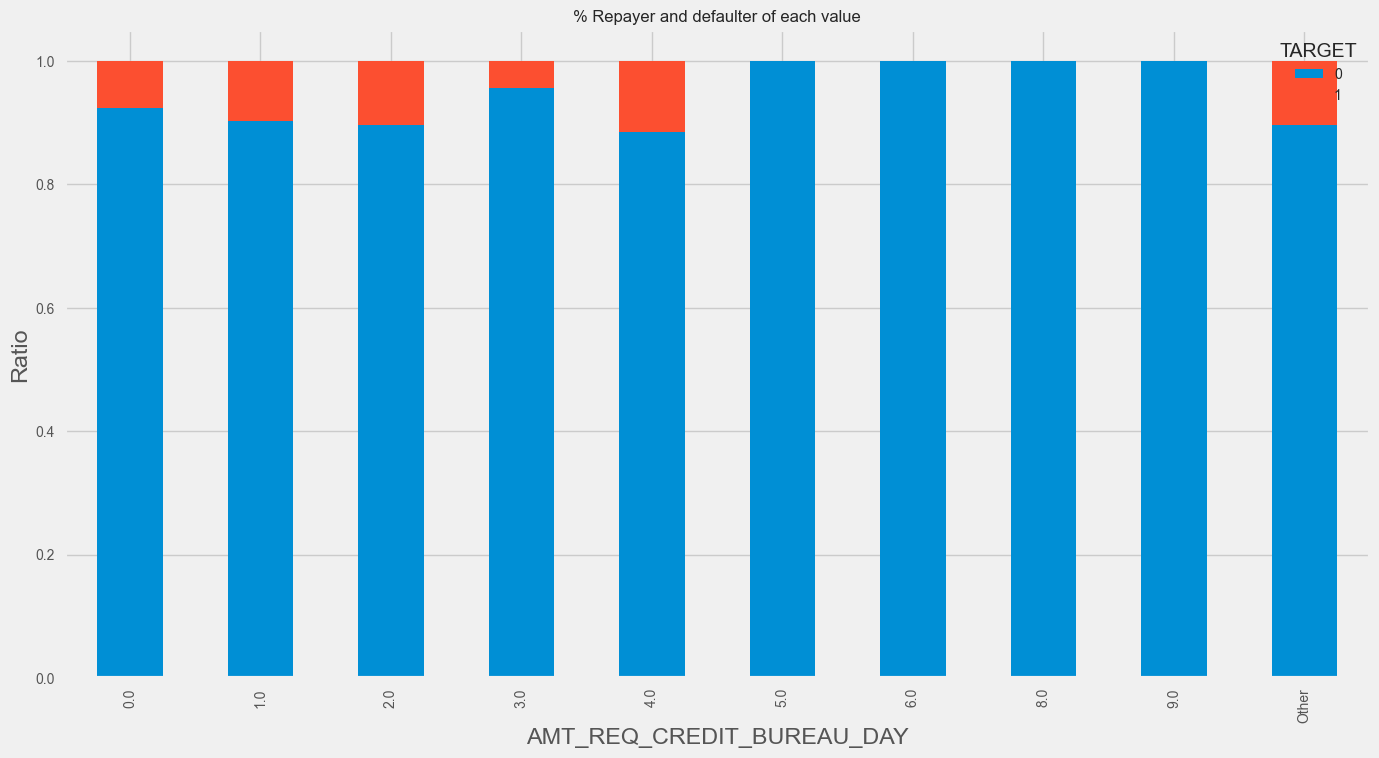

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_730/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


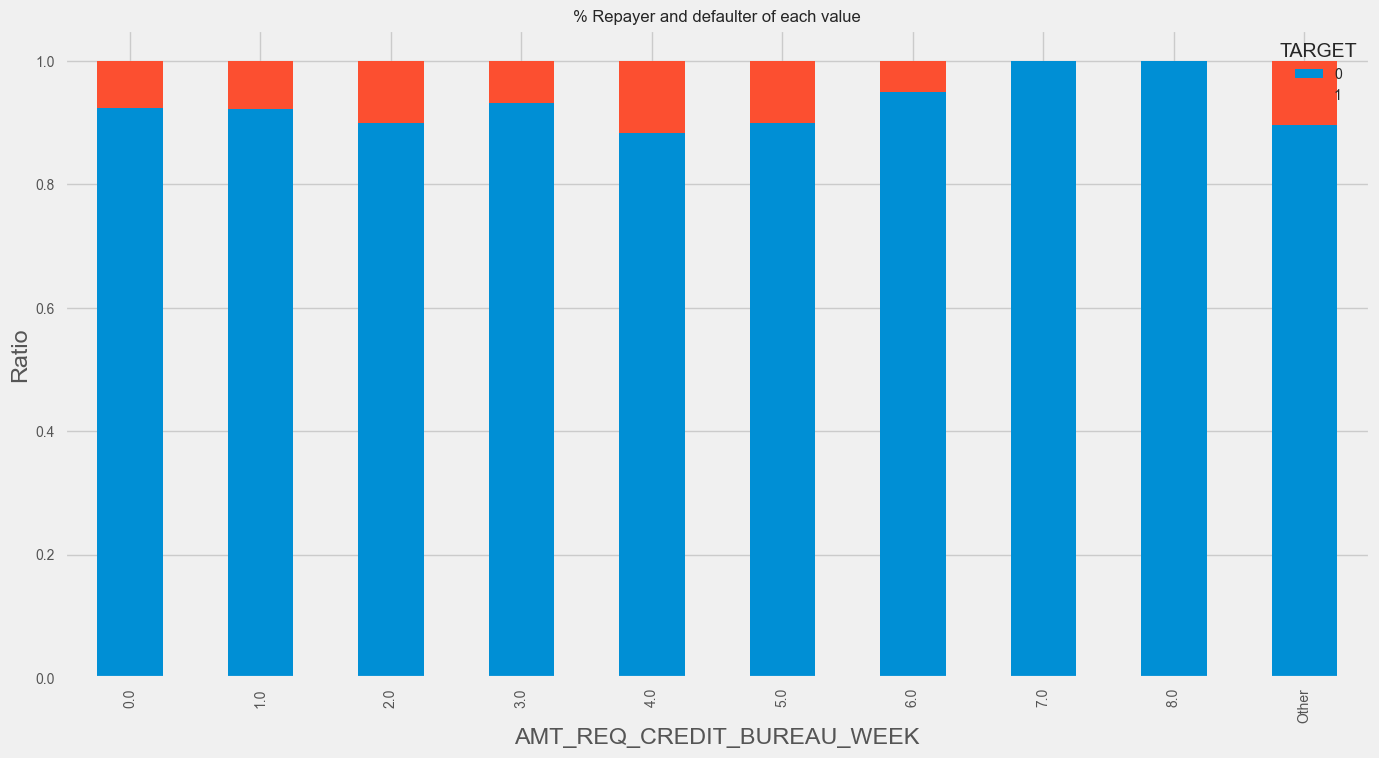

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_730/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


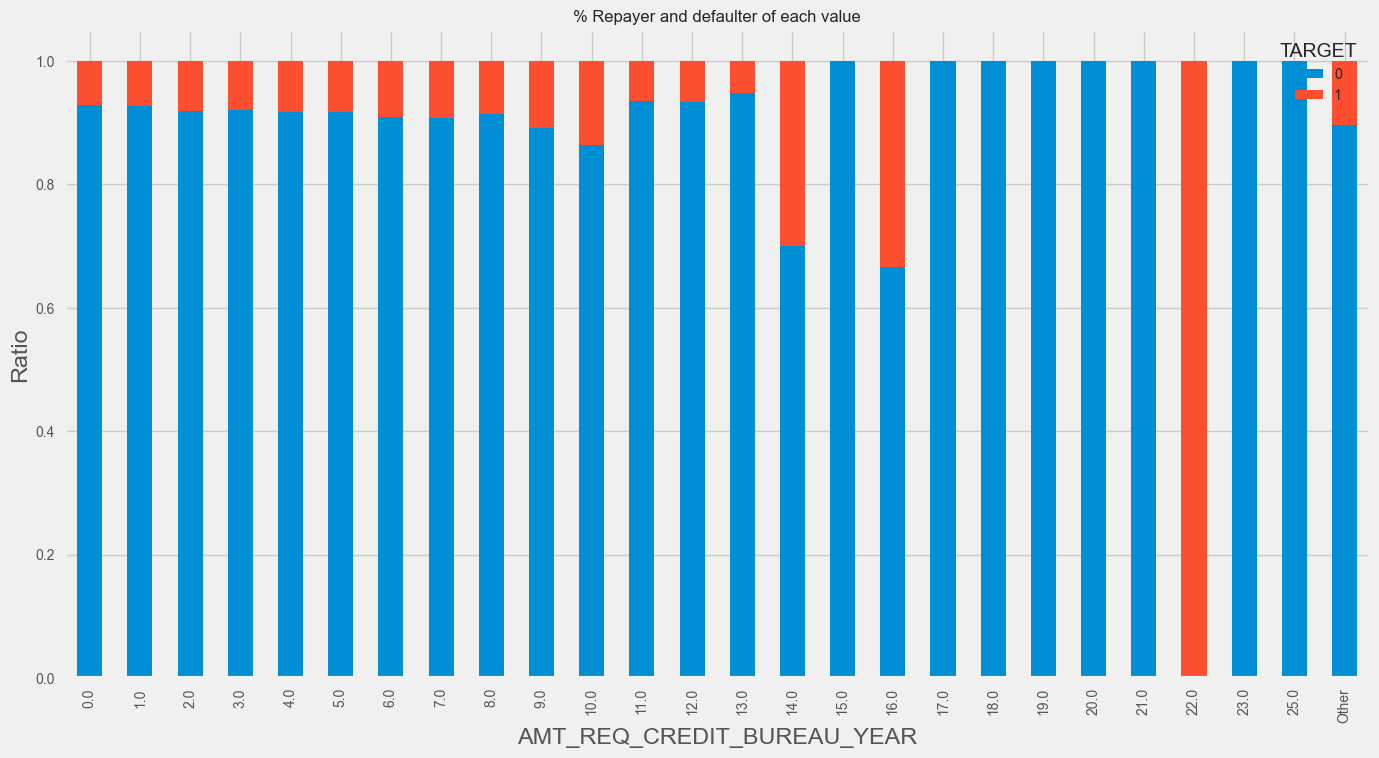

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_730/1141410793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')


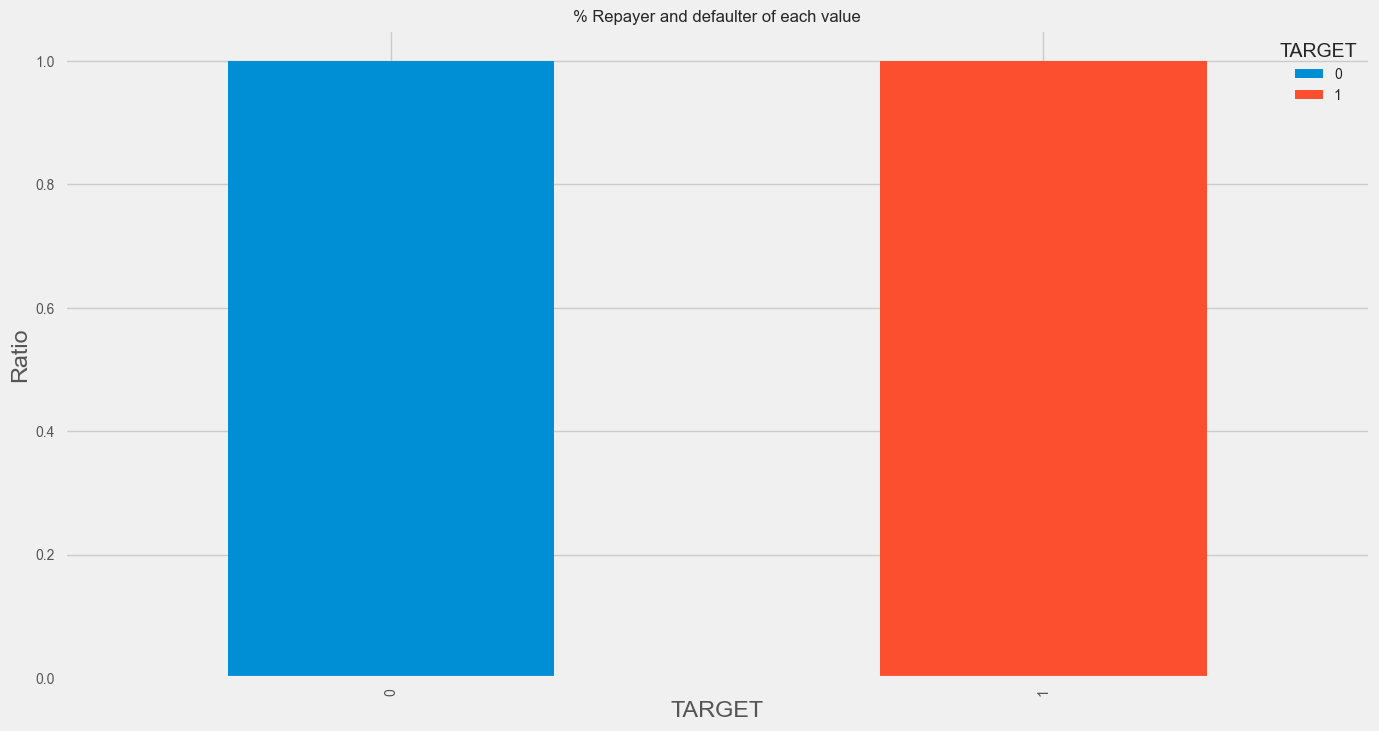

In [279]:
for col in df_AMT_REQ_CREDIT_BUREAU:
    df_AMT_REQ_CREDIT_BUREAU[col] = df_AMT_REQ_CREDIT_BUREAU[col].fillna('Other')
    plt.rcParams['figure.figsize'] = [15, 8]
    ax= plt.style.use('fivethirtyeight')
    table=pd.crosstab(df_AMT_REQ_CREDIT_BUREAU[col], df_AMT_REQ_CREDIT_BUREAU.TARGET)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title('% Repayer and defaulter of each value', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Ratio')
    plt.show()
    

In [280]:
#Due to the similarity between % Repayer and defaulter in each value in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR, we can fill null value with the median
df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace = True)
df_app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace = True)
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace = True)
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace = True)

In [281]:
# % null value in each column in df_app
round(df_app.isnull().sum() / df_app.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [282]:
df_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Services,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,School,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Business Entity Type 1,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0


Standardize Values

In [283]:
#Convert DAYS_BIRTH,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE from negative to positive as days cannot be negative
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
df_app['DAYS_EMPLOYED'] = abs(df_app['DAYS_EMPLOYED'])
df_app['DAYS_REGISTRATION'] = abs(df_app['DAYS_REGISTRATION'])
df_app['DAYS_ID_PUBLISH'] = abs(df_app['DAYS_ID_PUBLISH'])
df_app['DAYS_LAST_PHONE_CHANGE'] = abs(df_app['DAYS_LAST_PHONE_CHANGE'])


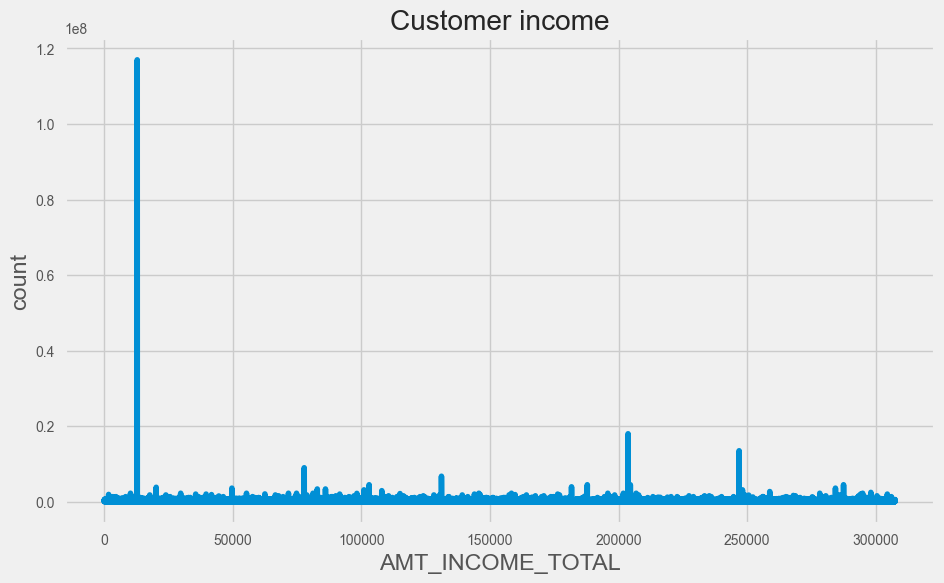

In [284]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
plt.plot(df_app['AMT_INCOME_TOTAL'])

# Set the labels and title
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('count')
plt.title('Customer income')
plt.show()

(array([ 4517., 22846., 75974., 79790.]),
 array([  1.,  50.,  80., 120., 160.]),
 <BarContainer object of 4 artists>)

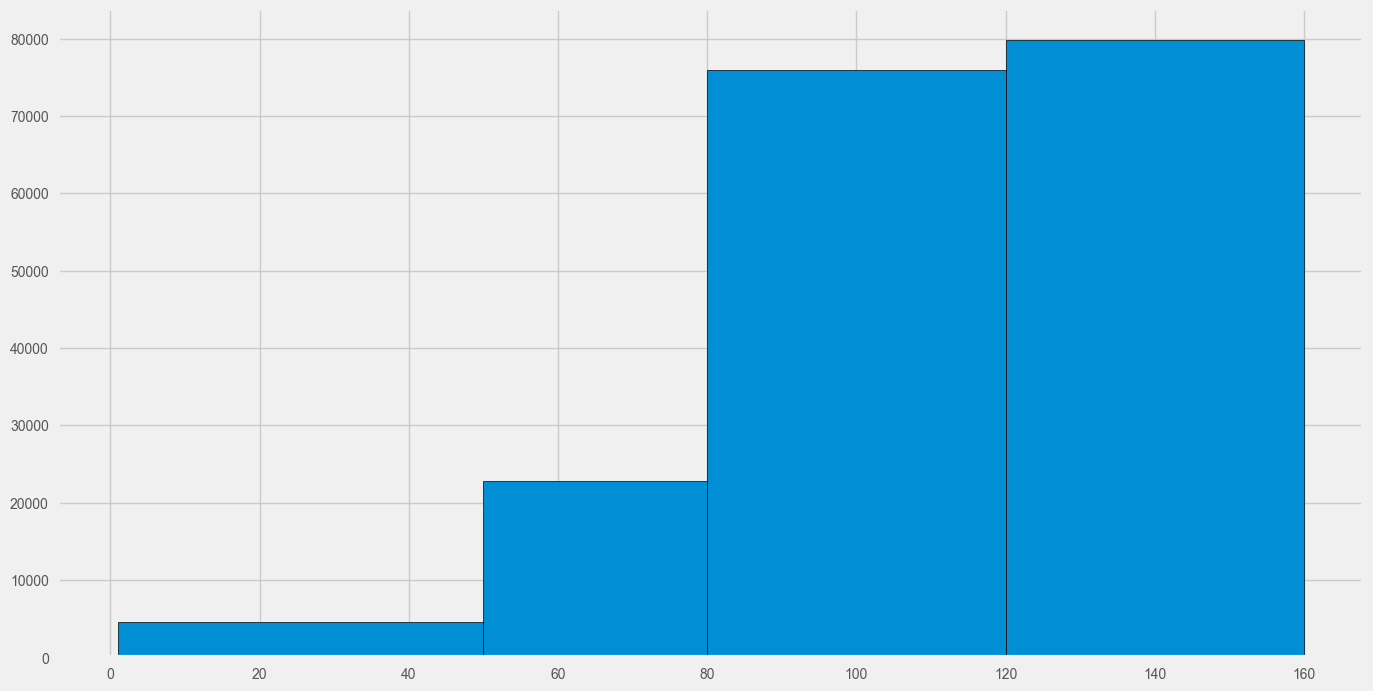

In [289]:
df_app['AMT_INCOME_TOTAL']=df_app['AMT_INCOME_TOTAL']/1000
bin_edges = [1, 50, 80, 120, 160]
plt.hist(df_app['AMT_INCOME_TOTAL'], bins=bin_edges, edgecolor='black')

In [258]:
#Classify customer income
df_app['AMT_INCOME_TOTAL']=df_app['AMT_INCOME_TOTAL']/1000
# Range for customer income
bins = [0, 50, 100, 150, 200, 250, 300, float('inf')] 

labels = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K','ABOVE 300K'] 


df_app['INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

In [259]:
df_app['INCOME_RANGE'].value_counts(normaleize=True)*100

INCOME_RANGE
100K-150K     29.784626
150K-200K     20.912097
50K-100K      19.245165
200K-250K     15.653749
ABOVE 300K     7.394532
250K-300K      5.540940
0-50K          1.468891
Name: proportion, dtype: float64

INSIGHT: More than 50% of Customer applied for loan has income from 100K-200K

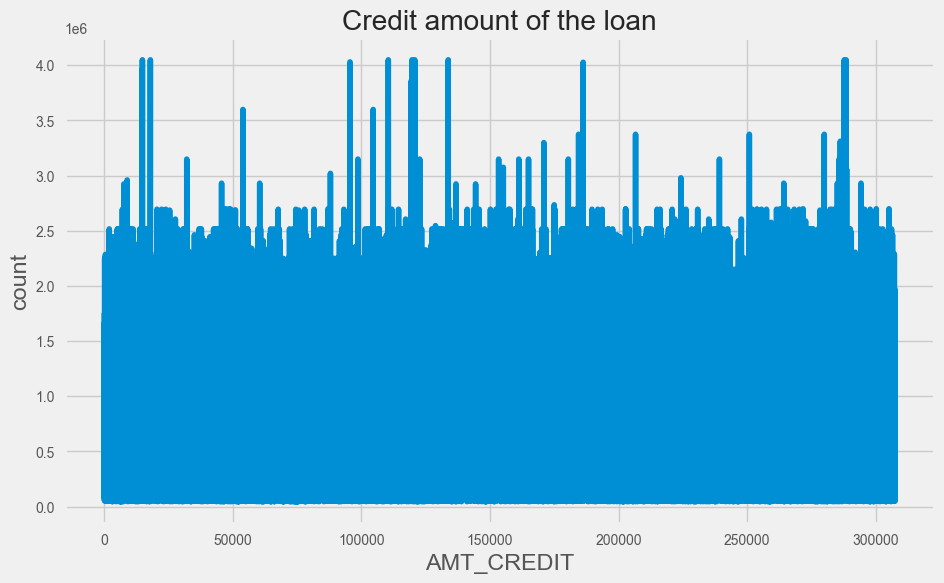

In [231]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
plt.plot(df_app['AMT_CREDIT'])

# Set the labels and title
plt.xlabel('AMT_CREDIT')
plt.ylabel('count')
plt.title('Credit amount of the loan')
plt.show()

In [ ]:
#Classify credit amount of the loan
df_app['AMT_CREDIT']=df_app['AMT_CREDIT']/1000
# Range for customer income
bins = [0, 50, 100, 150, 200, 250, 300, float('inf')] 

labels = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K','ABOVE 300K'] 


df_app['INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'], bins=bins, labels=labels)


# Analyse data